# HANDWRITTEN DIGIT IMAGE PREPROCESSING 

![alt text](https://media0.giphy.com/media/DHqth0hVQoIzS/200.gif)

One crucial part of the **"I Love Maths"** project is to make sure the image for the prediction has the same characteristics as the training data. 
To achieve that, we use OpenCV. **Your task: TO COMPLETE THE YOUR PART CODE**

## 1/ LOAD LIBRARIES

In [ ]:
!pip install mahotas

In [ ]:
!pip install imutils

In [1]:
import tensorflow as tf
print (tf.__version__)

import numpy as np
import cv2
print(cv2.__version__)
# from google.colab.patches import cv2_imshow #only in Colab

import mahotas 
import imutils

import matplotlib.pyplot as plt
%matplotlib inline

2.1.0
4.2.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## 🔰 Why we use **imutils** library?

imutils is openCV on steriod with easier interface function, just like jQuery to javascript.

This package includes a series of OpenCV + convenience functions that perform basics tasks such as translation, rotation, resizing, and skeletonization.

CODE LESS, DO MORE!

#### For example (translation - shifting image):

*   OPENCV
    
    
    M = np.float32([[1, 0, 25], [0, 1, -75]])

    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

*   imutils

    
    translated = imutils.translate(image, 25, -75)


## 🔰 Display Image from OpenCV on local notebook

```python
img = cv2.imread('sample.jpg') 
cv2.imshow('sample image',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
```

When above program is run, an image is shown in another window named ‘sample image’, as specified in the arguments of imshow().

This method is inconvenient since it opens a new window everytime. We can display the image from OpenCV by ```matplotlib``` with the help of imutils. 

```python 
image = cv2.imread('sample.jpg') 
plt.imshow(imutils.opencv2matplotlib(image))
plt.show()
```

## 2/ PREPROCESSING

### Processing Step

In [ ]:
# Load the working image
image = cv2.___

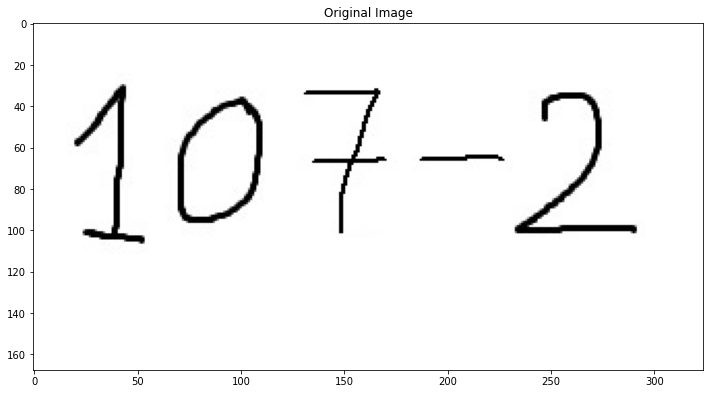

In [ ]:
# YOUR PART: Visualize using the convenient function opencv2matplotlib of imutils 
plt.figure(figsize=(12,8))
plt.imshow(___)
plt.title('Original Image')
plt.show()

In [ ]:
# YOUR PART: Change the image into grayscale
gray = ___

# YOUR PART: Blur it
blurred = ___

# YOUR PART: Threshold the image using adapative threshold
edged = ___

# YOUR PART: Find contours of the edges
(cnts, _) = ___

# Sort the coutours based on the top left position of the bounding box
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in cnts], key=lambda x: x[1])

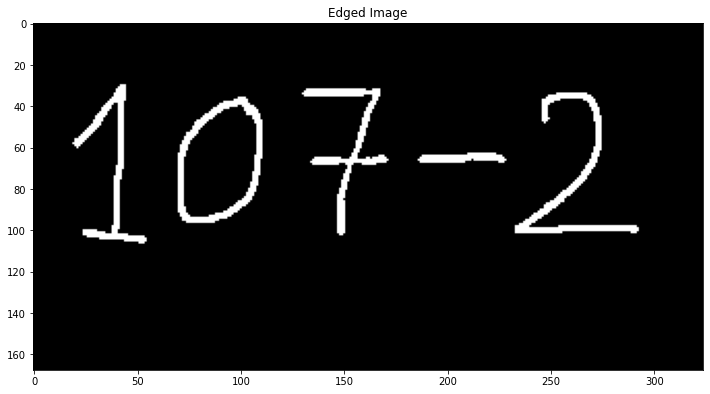

In [ ]:
# YOUR PART: Visualize the edged image using the convenient function opencv2matplotlib of imutils 
plt.___
plt.___
plt.___
plt.___

In [ ]:
# YOUR PART: Finish this code to straighten up a handwritten letter
# Google Keywords: Handwritten Digit Deskew

def deskew(image, width):
    """ Straighten up the handwritten image using warpAffine
    """

    # YOUR PART: Get height and width of input image
    (h, w) = ___

    # Find the image's center and skew
    moments = cv2.moments(image)
    skew = moments[___] / moments[___]

    # YOUR PART: Make the image stand up straight with warpAffine
    M = np.float32([[___, ___, ___],
                    [___, ___, ___]]
    image = cv2.warpAffine(___)
    
    # Resize the width to be exact size using imultils
    image = imutils.___

    return image

In [ ]:
def center_extent(image, size):
    """ Shift image's digits into the center of new canvas,
        which has the training size (28,28)
    """
    
    # RESIZE 
    (eW, eH) = size
    # if horizontal size is longer
    if ___ > ___:
        # resize its width to eW
        image = imutils.___
    else:
        # if vertical size is longer
        # resize its height to eH
        image = imutils.____

    # CENTERIZE 
    # make a black canvas with the size of (28, 28)
    extent = ___
    
    # calculate the offsetX and offsetY of old image to new canvas
    # offset = half of the different size between image and the black canvas
    offsetX = ___
    offsetY = ___

    # place the image right in the center of the canvas using offsetX and offsetY
    extent[___:___, ___:___] = image

    # find the middle of digit
    CM = mahotas.center_of_mass(extent)
    (cY, cX) = np.round(CM).astype("int32")

    # find the displacement distance of that middle of the digit to the middle of the canvas
    (dX, dY) = ((size[0]//2) - cX, (size[1] // 2) - cY)

    # move the digit to be totally in the middle of the canvas
    # check out yesterday notebook on warpAffine
    M = np.float32([[1, 0, __], 
                    [0, 1, __]])
    extent = cv2.warpAffine(___)

    return extent

#### Load model and test

In [ ]:
# tensorflow model load from h5 file
model = ___

🔰 Learn more about Mahotas and the Otsu thresholding image:

https://mahotas.readthedocs.io/en/latest/thresholding.html

🔰 Tips: When in doubt, print it out. Print! everything! out! to debug.

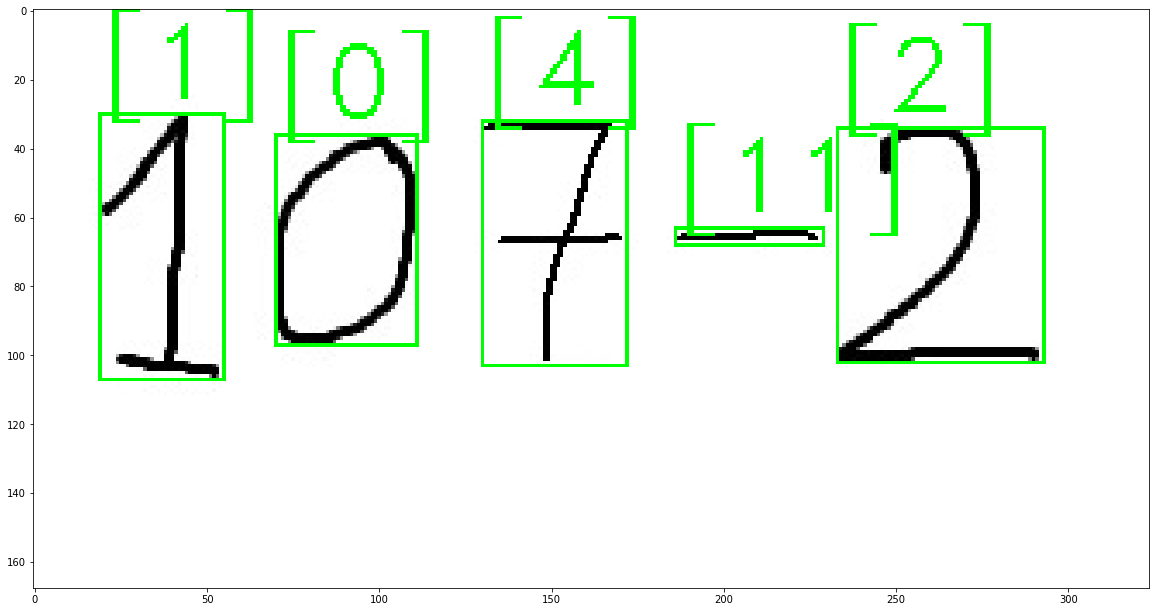

In [ ]:
plt.figure(figsize=(20,15))
result = image.copy()

for (c, _) in cnts:

    #  find an approximate rectangle points (x,y) (x+w, y+h) around the binary image. 
    (x, y, w, h) = cv2.boundingRect(c)

    # make sure the contours covering something big enough to be digits.
    if w >=5 and h>=5:
        single_digit_image = edged[y:y+int(1.2*h), x:x+w]

        # copy the digit to thresh to be preprocessed and be predicted later
        thresh = single_digit_image.copy()

        # find a threshold value based on otsu method
        T = mahotas.thresholding.otsu(single_digit_image)

        # Create a mask based on mahotas otsu threshold value
        # if the pixel > T then set it to be white (255), otherwise black.
        thresh[thresh > T] = 255
        
        # straighten up the digit image using deskew function 
        thresh = ___

        # resize and centerize the digit image using center_extent function
        thresh = ___
        
        # YOUR PART: normalize and make sure the image has the same shape
        # with the data we used to train the model.
        thresh = ___
        thresh = ___
        thresh = ___

        # Prediction
        predictions = model.predict(thresh)
        digit = int(np.argmax(predictions, axis=1))
        
        # THE NEXT TWO STEPS ARE FOR DISPLAYING PURPOSE ONLY,
        # YOU DON'T NEED THEM IN YOUR FLASK APP
        
        # YOUR PART: draw a rectangle around that digit in the main image 
        # with the size of (x,y) (x+w,y+h)
        result = cv2.____

        # YOUR PART: put prediction text near that box (maybe 5 pixels above) using cv2.putText 
        ___

# show the image
plt.imshow(imutils.opencv2matplotlib(result))

## 👩 DISCUSSION:

* Try on different test images in the preprocess_test_img folder. 
* Write your own numbers, take photos and test it. What are your observations? 
* Give some guess: Explain why the predictions are correct/incorrect?
* Are there anyway that we can further preprocess and correct the incorrect predictions?
* Do we really need to use deskew and center_extent function? Why?
* Try to remove some preprocess steps and see how the model works.

#### Congratulations, your raw images are fully preprocessed. 
#### Go have a break and back for the flaskapp 🤘🏻